<h1>Augmentation Example</h1>
<p>Here we show one way to augment the data based on the weighted k-nearest-neighbors.</p>
<p>We note that this is just one way to augment the data and generating more sophisticated and realistic synthetic samples is a research area that would likely improve the performance.</p> 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import print_function
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# To import ann4brains if not installed.
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from ann4brains.synthetic.injury import ConnectomeInjury
from ann4brains.augment import init_weights, label_distance, combine_neighbours

In [3]:
# Augmentation hyper-parameters. 
k = 5 # How many neighbours to consider.
p = 8 # How to weigh the neighbours.

In [4]:
# Object to create synthetic injury data.
injury = ConnectomeInjury(
    base_filename=os.path.join('data', 'base.mat'), # Where the base matrix is.
    n_injuries=2, # Only works for 2 injuries right now.
    signature_seed=333, # Set the seed so we generate the same signatures.
) 

In [5]:
# Generate train data
np.random.seed(seed=333) # To reproduce results.
x_train, y_train = injury.generate_injury(n_samples=112, noise_weight=0.125)
print(x_train.shape, y_train.shape)

(112, 1, 90, 90) (112, 2)


In [6]:
# Here we choose a random sample to augment.
# You could also choose from samples that are underrepresented 
# in the training data to try and balance the data.
use_index = np.random.randint(len(y_train))
print(use_index)

42


[1.3286434 0.8106401]


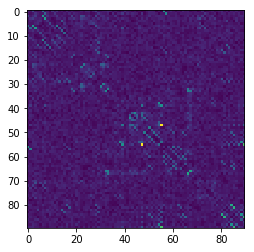

In [7]:
# This is the original data we are sampling from.
x_original = np.squeeze(x_train[use_index,:,:,:])
plt.imshow(x_original)
print(y_train[use_index])

In [8]:
# Compute the distance in label space.
D = label_distance(y_train[use_index], y_train)
print(D.shape)

(112, 1)


In [9]:
# Sort to find the k-nearest in label space.
sort_index = np.argsort(np.squeeze(D))

In [10]:
# Determine a weighting for each neighbour.
W = init_weights(k,p)
print(W)

[6.98900755e-01 1.09689996e-08 2.99119855e-01 1.97626288e-03
 3.11678339e-06]


In [11]:
# Select the neighbourhood data. 
X_neighs = x_train[sort_index[:k],:]
Y_neighs = y_train[sort_index[:k]]
print(X_neighs.shape)
print(Y_neighs.shape)

(5, 1, 90, 90)
(5, 2)


In [12]:
# Combine the weighted neighbours to make a new single augmented sample.
x_aug, y_aug = combine_neighbours(W, X_neighs, Y_neighs)

[1.2192059 0.9206152]


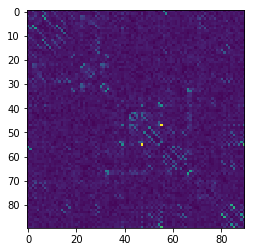

In [13]:
plt.imshow(np.squeeze(x_aug))
print(y_aug)

In [14]:
# The augmented image is different from the original image.
assert not np.allclose(x_aug, x_original)

In [15]:
# The augmented y labels are different from the original labels.
assert not np.allclose(y_aug, y_train[use_index])